In [2]:
import numpy as np
import pandas as pd

#### Timestamp Object
###### Time stamps reference particular moments in time (e.g Oct 24th,2022 at 7:00 pm)

##### Creating Timestamp Objects

In [3]:
# creating timestamp
pd.Timestamp('2025/06/19')

Timestamp('2025-06-19 00:00:00')

In [9]:
# variations
pd.Timestamp('2025-6-19')
pd.Timestamp('2025, 6, 19')

Timestamp('2025-06-19 00:00:00')

In [10]:
# only year
pd.Timestamp('2025')

Timestamp('2025-01-01 00:00:00')

In [11]:
# using text
pd.Timestamp('19th June 2025')

Timestamp('2025-06-19 00:00:00')

In [19]:
# providing time also
pd.Timestamp('19th June 2025 13:38')

Timestamp('2025-06-19 13:38:00')

datetime object of python ( NOTE : All the above are datetime object of pandas)

In [27]:
# using datetime.datetime object
import datetime as dt
dt.datetime(2025,6,19,13,44,40)
# Now you can make Timestamp uaing datetime 
x = pd.Timestamp(dt.datetime(2025,6,19,13,44,40))
x

Timestamp('2025-06-19 13:44:40')

###### The main profit of storing datwetime in a variable is that you can easily fetch every attributes you want 

In [31]:
# fetching attributes
print(x.year)
print(x.month)
print(x.day)
print(x.hour)
print(x.minute)
print(x.second)

2025
6
19
13
44
40


In [ ]:
# why separate objects to handle data and time when python already has datetime functionality?

 syntax wise datetime is very convenient
 But the performance takes a hit while working with huge data. List vs Numpy Array
 The weaknesses of Python's datetime format inspired the NumPy team to add a set of native time series data type to NumPy.
 The datetime64 dtype encodes dates as 64-bit integers, and thus allows arrays of dates to be represented very compactly.

In [43]:
import numpy as np
# date = np.array('2025-6-19',dtype = np.datetime64[D])
# date
# Above one is sir's code but not working for now ao use this one
date = np.array('2025-06-19', dtype='datetime64[D]')
date

array('2025-06-19', dtype='datetime64[D]')

In [44]:
date + np.arange(12)
# It means numpy datetime object support vectorized operations

array(['2025-06-19', '2025-06-20', '2025-06-21', '2025-06-22',
       '2025-06-23', '2025-06-24', '2025-06-25', '2025-06-26',
       '2025-06-27', '2025-06-28', '2025-06-29', '2025-06-30'],
      dtype='datetime64[D]')

###### Because of the uniform type in NumPy datetime64 arrays, this type of operation can be accomplished much more quickly than if we were working directly with Python's datetime objects, especially as arrays get large

###### Pandas Timestamp object combines the ease-of-use of python datetime with the efficient storage and vectorized interface of numpy.datetime64

###### From a group of these Timestamp objects, Pandas can construct a DatetimeIndex that can be used to index data in a Series or DataFrame

#### DatetimeIndex Object

##### A collection of pandas timestamp

###### NOTE : Single datetime ko store krne k liye timestamp use krte hain and multiple k liye Datetimeindex use karte hain

In [46]:
# from strings
pd.DatetimeIndex(['2025/6/19','2025/6/20','2025/6/21'])

DatetimeIndex(['2025-06-19', '2025-06-20', '2025-06-21'], dtype='datetime64[ns]', freq=None)

In [49]:
# if you fetch the single date from above DatetimeIndex then it would be Timestamp
pd.DatetimeIndex(['2025/6/19','2025/6/20','2025/6/21'])[0]
# See in output showing Timestamp or you can use type()

Timestamp('2025-06-19 00:00:00')

In [50]:
# using python datetime object
pd.DatetimeIndex([dt.datetime(2025,6,19),dt.datetime(2026,6,19),dt.datetime(2027,6,19)])

DatetimeIndex(['2025-06-19', '2026-06-19', '2027-06-19'], dtype='datetime64[ns]', freq=None)

In [53]:
# using pd.timestamps
dt_index = pd.DatetimeIndex([pd.Timestamp(2025,6,19),pd.Timestamp(2026,6,19),pd.Timestamp(2027,6,19)])

In [54]:
# using datetimeIndex as series index
pd.Series([1,2,3],index = dt_index)

2025-06-19    1
2026-06-19    2
2027-06-19    3
dtype: int64

##### date_range function

In [58]:
# generates daily dates in a given range
pd.date_range(start = '2025/5/15',end = '2025/6/19', freq = 'D')
# THe default value of freq is D

DatetimeIndex(['2025-05-15', '2025-05-16', '2025-05-17', '2025-05-18',
               '2025-05-19', '2025-05-20', '2025-05-21', '2025-05-22',
               '2025-05-23', '2025-05-24', '2025-05-25', '2025-05-26',
               '2025-05-27', '2025-05-28', '2025-05-29', '2025-05-30',
               '2025-05-31', '2025-06-01', '2025-06-02', '2025-06-03',
               '2025-06-04', '2025-06-05', '2025-06-06', '2025-06-07',
               '2025-06-08', '2025-06-09', '2025-06-10', '2025-06-11',
               '2025-06-12', '2025-06-13', '2025-06-14', '2025-06-15',
               '2025-06-16', '2025-06-17', '2025-06-18', '2025-06-19'],
              dtype='datetime64[ns]', freq='D')

In [59]:
# alternate days in a given range -->> just replace D by 2D in freq 
pd.date_range(start = '2025/5/15',end = '2025/6/19', freq = '2D')

DatetimeIndex(['2025-05-15', '2025-05-17', '2025-05-19', '2025-05-21',
               '2025-05-23', '2025-05-25', '2025-05-27', '2025-05-29',
               '2025-05-31', '2025-06-02', '2025-06-04', '2025-06-06',
               '2025-06-08', '2025-06-10', '2025-06-12', '2025-06-14',
               '2025-06-16', '2025-06-18'],
              dtype='datetime64[ns]', freq='2D')

In [60]:
# for a gap of 3 days just use freq = 3D
pd.date_range(start = '2025/5/15',end = '2025/6/19', freq = '3D')

DatetimeIndex(['2025-05-15', '2025-05-18', '2025-05-21', '2025-05-24',
               '2025-05-27', '2025-05-30', '2025-06-02', '2025-06-05',
               '2025-06-08', '2025-06-11', '2025-06-14', '2025-06-17'],
              dtype='datetime64[ns]', freq='3D')

In [62]:
# B -->> If you want only business days (i.e mondat to friday/Saturday ) just use freq] = "B"
pd.date_range(start = '2025/5/15',end = '2025/6/19', freq = 'B')

DatetimeIndex(['2025-05-15', '2025-05-16', '2025-05-19', '2025-05-20',
               '2025-05-21', '2025-05-22', '2025-05-23', '2025-05-26',
               '2025-05-27', '2025-05-28', '2025-05-29', '2025-05-30',
               '2025-06-02', '2025-06-03', '2025-06-04', '2025-06-05',
               '2025-06-06', '2025-06-09', '2025-06-10', '2025-06-11',
               '2025-06-12', '2025-06-13', '2025-06-16', '2025-06-17',
               '2025-06-18', '2025-06-19'],
              dtype='datetime64[ns]', freq='B')

In [73]:
# W -->> If you want only a suingle day from each week
pd.date_range(start = '2025/5/15',end = '2025/6/19', freq = 'W')

DatetimeIndex(['2025-05-18', '2025-05-25', '2025-06-01', '2025-06-08',
               '2025-06-15'],
              dtype='datetime64[ns]', freq='W-SUN')

In [74]:
# W-day -->> If you want any specific day from each week then use freq = W-days you want
pd.date_range(start = '2025/5/15',end = '2025/6/19', freq = 'W-THU')

DatetimeIndex(['2025-05-15', '2025-05-22', '2025-05-29', '2025-06-05',
               '2025-06-12', '2025-06-19'],
              dtype='datetime64[ns]', freq='W-THU')

In [75]:
# H -->> Hourly data ( factor) NotE : In new version use h instead of H
pd.date_range(start = '2025/6/17',end = '2025/6/19', freq = 'h')

DatetimeIndex(['2025-06-17 00:00:00', '2025-06-17 01:00:00',
               '2025-06-17 02:00:00', '2025-06-17 03:00:00',
               '2025-06-17 04:00:00', '2025-06-17 05:00:00',
               '2025-06-17 06:00:00', '2025-06-17 07:00:00',
               '2025-06-17 08:00:00', '2025-06-17 09:00:00',
               '2025-06-17 10:00:00', '2025-06-17 11:00:00',
               '2025-06-17 12:00:00', '2025-06-17 13:00:00',
               '2025-06-17 14:00:00', '2025-06-17 15:00:00',
               '2025-06-17 16:00:00', '2025-06-17 17:00:00',
               '2025-06-17 18:00:00', '2025-06-17 19:00:00',
               '2025-06-17 20:00:00', '2025-06-17 21:00:00',
               '2025-06-17 22:00:00', '2025-06-17 23:00:00',
               '2025-06-18 00:00:00', '2025-06-18 01:00:00',
               '2025-06-18 02:00:00', '2025-06-18 03:00:00',
               '2025-06-18 04:00:00', '2025-06-18 05:00:00',
               '2025-06-18 06:00:00', '2025-06-18 07:00:00',
               '2025-06-

In [76]:
pd.date_range(start = '2025/6/17',end = '2025/6/19', freq = '6h')

DatetimeIndex(['2025-06-17 00:00:00', '2025-06-17 06:00:00',
               '2025-06-17 12:00:00', '2025-06-17 18:00:00',
               '2025-06-18 00:00:00', '2025-06-18 06:00:00',
               '2025-06-18 12:00:00', '2025-06-18 18:00:00',
               '2025-06-19 00:00:00'],
              dtype='datetime64[ns]', freq='6h')

In [79]:
# M -->> Month end (In new version M is replaced by ME)
pd.date_range(start = '2025/5/15',end = '2025/6/19', freq = 'ME')

DatetimeIndex(['2025-05-31'], dtype='datetime64[ns]', freq='ME')

In [80]:
# MS -->> Month Start
pd.date_range(start = '2025/5/15',end = '2025/6/19', freq = 'MS')

DatetimeIndex(['2025-06-01'], dtype='datetime64[ns]', freq='MS')

In [84]:
# A -->> year End (Now in new version use YE instead of A otherwise error will show)
pd.date_range(start = '2025/5/15',end = '2035/6/19', freq = 'YE')

DatetimeIndex(['2025-12-31', '2026-12-31', '2027-12-31', '2028-12-31',
               '2029-12-31', '2030-12-31', '2031-12-31', '2032-12-31',
               '2033-12-31', '2034-12-31'],
              dtype='datetime64[ns]', freq='YE-DEC')

In [85]:
# using periods (number of results)
pd.date_range(start = '2025/5/1',periods = 25, freq = 'D')

DatetimeIndex(['2025-05-01', '2025-05-02', '2025-05-03', '2025-05-04',
               '2025-05-05', '2025-05-06', '2025-05-07', '2025-05-08',
               '2025-05-09', '2025-05-10', '2025-05-11', '2025-05-12',
               '2025-05-13', '2025-05-14', '2025-05-15', '2025-05-16',
               '2025-05-17', '2025-05-18', '2025-05-19', '2025-05-20',
               '2025-05-21', '2025-05-22', '2025-05-23', '2025-05-24',
               '2025-05-25'],
              dtype='datetime64[ns]', freq='D')

In [87]:
# using periods (number of results) -->> Hourly
pd.date_range(start = '2025/5/1',periods = 25, freq = 'h')

DatetimeIndex(['2025-05-01 00:00:00', '2025-05-01 01:00:00',
               '2025-05-01 02:00:00', '2025-05-01 03:00:00',
               '2025-05-01 04:00:00', '2025-05-01 05:00:00',
               '2025-05-01 06:00:00', '2025-05-01 07:00:00',
               '2025-05-01 08:00:00', '2025-05-01 09:00:00',
               '2025-05-01 10:00:00', '2025-05-01 11:00:00',
               '2025-05-01 12:00:00', '2025-05-01 13:00:00',
               '2025-05-01 14:00:00', '2025-05-01 15:00:00',
               '2025-05-01 16:00:00', '2025-05-01 17:00:00',
               '2025-05-01 18:00:00', '2025-05-01 19:00:00',
               '2025-05-01 20:00:00', '2025-05-01 21:00:00',
               '2025-05-01 22:00:00', '2025-05-01 23:00:00',
               '2025-05-02 00:00:00'],
              dtype='datetime64[ns]', freq='h')

##### to_datetime function

###### converts an existing objects to pandas timestamp/datetimeindex object 

In [94]:
# simple series example
s = pd.Series(['2025/6/19','2026/6/19','2027/6/19'])
s.str.split('/').str.get(0)
# It's better to convert it into datetime make analysis easily

0    2025
1    2026
2    2027
dtype: object

In [95]:
pd.to_datetime(s).dt.day_name()

0    Thursday
1      Friday
2    Saturday
dtype: object

In [103]:
# some errors while converting to datetime
s = pd.Series(['2025/6/19','2026/6/19','2027/600/19'])
pd.to_datetime(s)
# The error is because month cannot greater than 12 but provided 600 let say by mistake to solve this we use a parameter 

ValueError: time data "2027/600/19" doesn't match format "%Y/%m/%d", at position 2. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [104]:
s = pd.Series(['2025/6/19','2026/6/19','2027/600/19'])
pd.to_datetime(s,errors = 'coerce')

0   2025-06-19
1   2026-06-19
2          NaT
dtype: datetime64[ns]

In [105]:
# Now you can do any operations related to this and it will not throw any error
pd.to_datetime(s,errors = 'coerce').dt.year

0    2025.0
1    2026.0
2       NaN
dtype: float64

In [106]:
pd.to_datetime(s,errors = 'coerce').dt.month_name()

0    June
1    June
2     NaN
dtype: object

In [116]:
df = pd.read_csv(r"C:\Users\deepu\OneDrive\Desktop\Python\expense_data.csv")
df.shape

(277, 11)

In [117]:
df.head()

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1
0,3/2/2022 10:11,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0
1,3/2/2022 10:11,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0
2,3/1/2022 19:50,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0
3,3/1/2022 18:56,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0
4,3/1/2022 18:22,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0


In [118]:
df.info()
# As date ka dtype is object but not datetime hence you cannot do any opertions related to datetime so first convert it.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            277 non-null    object 
 1   Account         277 non-null    object 
 2   Category        277 non-null    object 
 3   Subcategory     0 non-null      float64
 4   Note            273 non-null    object 
 5   INR             277 non-null    float64
 6   Income/Expense  277 non-null    object 
 7   Note.1          0 non-null      float64
 8   Amount          277 non-null    float64
 9   Currency        277 non-null    object 
 10  Account.1       277 non-null    float64
dtypes: float64(5), object(6)
memory usage: 23.9+ KB


In [120]:
df['Date'].dt.year
# Gives error bcoz dtype of datetime is object 

AttributeError: Can only use .dt accessor with datetimelike values

In [121]:
df['Date'] = pd.to_datetime(df['Date'])

In [122]:
# Now you can check by df.info that dtype of date is  changes into datetime from object
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            277 non-null    datetime64[ns]
 1   Account         277 non-null    object        
 2   Category        277 non-null    object        
 3   Subcategory     0 non-null      float64       
 4   Note            273 non-null    object        
 5   INR             277 non-null    float64       
 6   Income/Expense  277 non-null    object        
 7   Note.1          0 non-null      float64       
 8   Amount          277 non-null    float64       
 9   Currency        277 non-null    object        
 10  Account.1       277 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 23.9+ KB


In [124]:
# Now using dt accessor you can do any operations

##### dt accessor
###### Accessor object for datetime like properties of the Series values.

In [125]:
df['Date'].dt.year

0      2022
1      2022
2      2022
3      2022
4      2022
       ... 
272    2021
273    2021
274    2021
275    2021
276    2021
Name: Date, Length: 277, dtype: int32

In [130]:
df['Date'].dt.month_name()

0         March
1         March
2         March
3         March
4         March
         ...   
272    November
273    November
274    November
275    November
276    November
Name: Date, Length: 277, dtype: object

In [131]:
df['Date'].dt.day_name()

0      Wednesday
1      Wednesday
2        Tuesday
3        Tuesday
4        Tuesday
         ...    
272       Monday
273       Monday
274       Sunday
275       Sunday
276       Sunday
Name: Date, Length: 277, dtype: object

In [133]:
df['Date'].dt.is_month_end

0      False
1      False
2      False
3      False
4      False
       ...  
272    False
273    False
274    False
275    False
276    False
Name: Date, Length: 277, dtype: bool

In [134]:
df['Date'].dt.is_quarter_end

0      False
1      False
2      False
3      False
4      False
       ...  
272    False
273    False
274    False
275    False
276    False
Name: Date, Length: 277, dtype: bool

In [135]:
df['Date'].dt.is_quarter_start

0      False
1      False
2      False
3      False
4      False
       ...  
272    False
273    False
274    False
275    False
276    False
Name: Date, Length: 277, dtype: bool

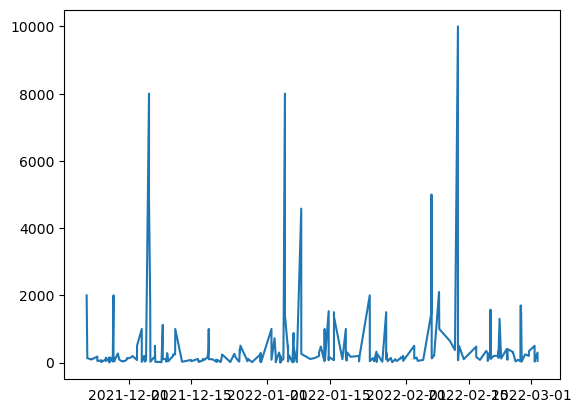

In [136]:
# plotting graph
import matplotlib.pyplot as plt
plt.plot(df['Date'],df['INR'])

In [139]:
# day name wise bar chart/ month wise bar chart
df['day_name'] = df['Date'].dt.day_name()
df.head()

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1,day_name
0,2022-03-02 10:11:00,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0,Wednesday
1,2022-03-02 10:11:00,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0,Wednesday
2,2022-03-01 19:50:00,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0,Tuesday
3,2022-03-01 18:56:00,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0,Tuesday
4,2022-03-01 18:22:00,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0,Tuesday


<Axes: xlabel='day_name'>

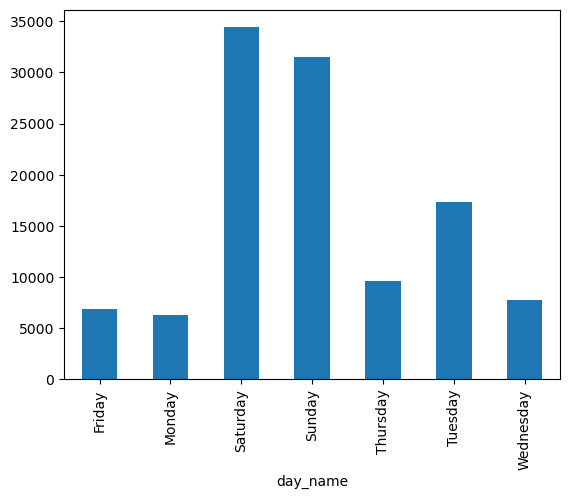

In [140]:
# Now applying groupby 
df.groupby('day_name')['INR'].sum().plot(kind = 'bar')

<Axes: ylabel='INR'>

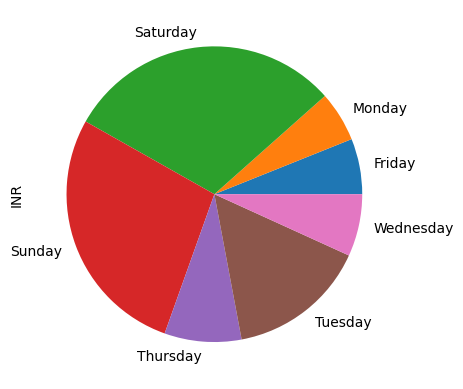

In [145]:
df.groupby('day_name')['INR'].sum().plot(kind = 'pie')

In [ ]:
# Noe by month wise

In [141]:
df['month_name'] = df['Date'].dt.month_name()
df.head()

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1,day_name,month_name
0,2022-03-02 10:11:00,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0,Wednesday,March
1,2022-03-02 10:11:00,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0,Wednesday,March
2,2022-03-01 19:50:00,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0,Tuesday,March
3,2022-03-01 18:56:00,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0,Tuesday,March
4,2022-03-01 18:22:00,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0,Tuesday,March


<Axes: xlabel='month_name'>

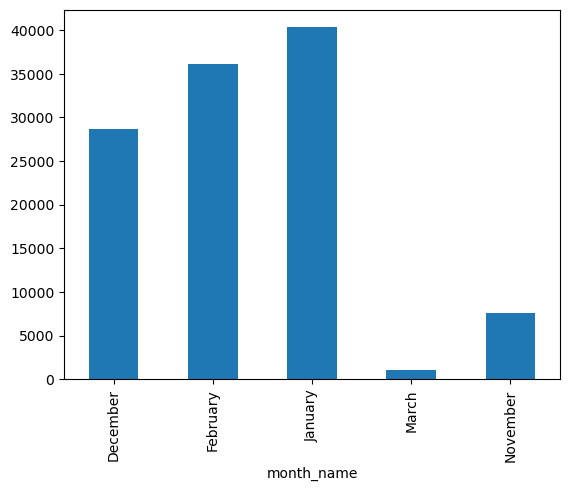

In [143]:
df.groupby('month_name')['INR'].sum().plot(kind = 'bar')

<Axes: ylabel='INR'>

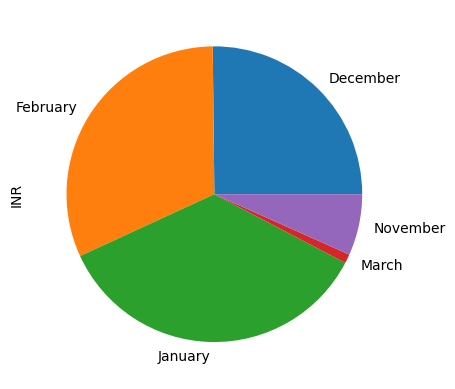

In [146]:
df.groupby('month_name')['INR'].sum().plot(kind = 'pie')

<Axes: ylabel='INR'>

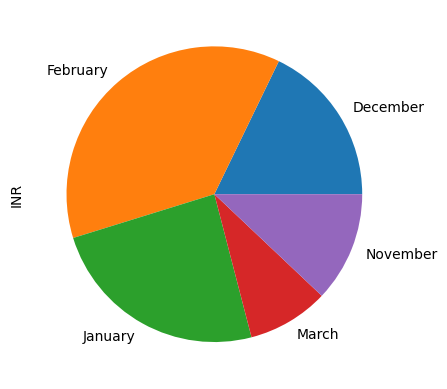

In [151]:
df.groupby('month_name')['INR'].mean().plot(kind = 'pie')

In [ ]:
# Find the expenses made by him a